In [107]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import plotly.plotly as py
import plotly.graph_objs as go

In [56]:
stock = pd.read_excel("Stock Price.xlsx")
index_price = pd.read_excel("Index Price.xlsx")

In [57]:
stock.columns = ['Date', 'x2330', 'x2317', 'x6505', 'x2412', 'x3008']
stock.set_index("Date",inplace= True)

In [58]:
index_price.columns = ['Date', '日經225指數', '香港恆生指數',
       '美國NASDAQ Composite指數', '中國上證180指數',
       'TI']
index_price.set_index("Date", inplace=True)
TI = index_price.iloc[:,4:5]

In [59]:
fulltable = stock.join(TI)
fulltable_return = fulltable.pct_change().dropna()
fulltableT = fulltable_return.transpose()

In [60]:
data = fulltableT.values

In [61]:
def ols(i):
    slope, intercept, r_value, p_value, std_err = stats.linregress(data[5], data[i])
    return slope, intercept, r_value, p_value, std_err

In [62]:
slope, intercept, r_value, p_value, std_err = np.column_stack([
    ols(i) 
    for i in range(5)
])

In [63]:
result1 = pd.DataFrame([])

result1["Name"] = fulltable.columns.tolist()[:5]
result1["Slope"] = slope
result1["Intercept"] = intercept
result1["R"] = r_value
result1["P-value"] = p_value
result1["Std ERR"] = std_err
result1.set_index("Name", inplace=True)
result1 = result1.transpose()

In [64]:
result1

Name,x2330,x2317,x6505,x2412,x3008
Slope,1.012544,1.231096,8.023646e-01,3.067692e-01,1.226868e+00
Intercept,0.000528,-0.000258,8.650164e-05,2.649602e-04,1.367997e-03
R,0.719706,0.718608,5.716112e-01,2.902508e-01,5.156340e-01
P-value,0.000000,0.000000,4.491922e-215,2.533033e-49,1.761032e-168
Std ERR,0.019626,0.023938,2.314194e-02,2.032193e-02,4.096165e-02


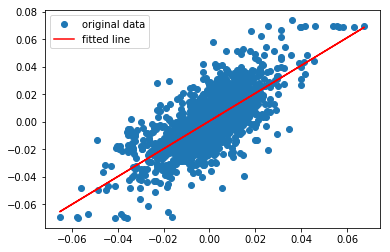

In [53]:
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(data[5], data[0])
plt.plot(data[5], data[0], 'o', label='original data')
plt.plot(data[5], intercept + slope*data[5], 'r', label='fitted line')
plt.legend()
plt.show()